In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']

In [4]:
df_raw = pd.read_csv('final.csv')

# use 100 data only
# df_raw = df_raw.head(100)

df_raw = df_raw.set_index('datetime')

In [5]:
df_raw

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...
4/6/2021 08:00:00,42,986,328,771.720,7.638,16.896
4/6/2021 08:15:00,42,984,325,766.032,7.602,16.704
4/6/2021 08:30:00,42,986,328,765.216,7.638,16.704


# normalization min max

In [6]:
def minmax_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
    

In [7]:
df_normalized = df_raw.copy()
df_normalized[columns2] = minmax_normalize(df_normalized[columns2])

df_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.113730,0.479358
...,...,...,...,...,...,...
4/6/2021 08:00:00,1.0,0.650862,0.666667,0.569476,0.988046,0.256881
4/6/2021 08:15:00,1.0,0.642241,0.583333,0.549359,0.975751,0.252294
4/6/2021 08:30:00,1.0,0.650862,0.666667,0.546473,0.988046,0.252294


In [8]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
def plot_rows(df, columns):
    fig, ax = plt.subplots(len(columns), 1, figsize=(10, 10))
    for i, column in enumerate(columns):
        ax[i].plot(df.index, df[column])
        # reduce x label
        ax[i].set_xticks(ax[i].get_xticks()[::30])
        ax[i].set_title(column)
    plt.show()

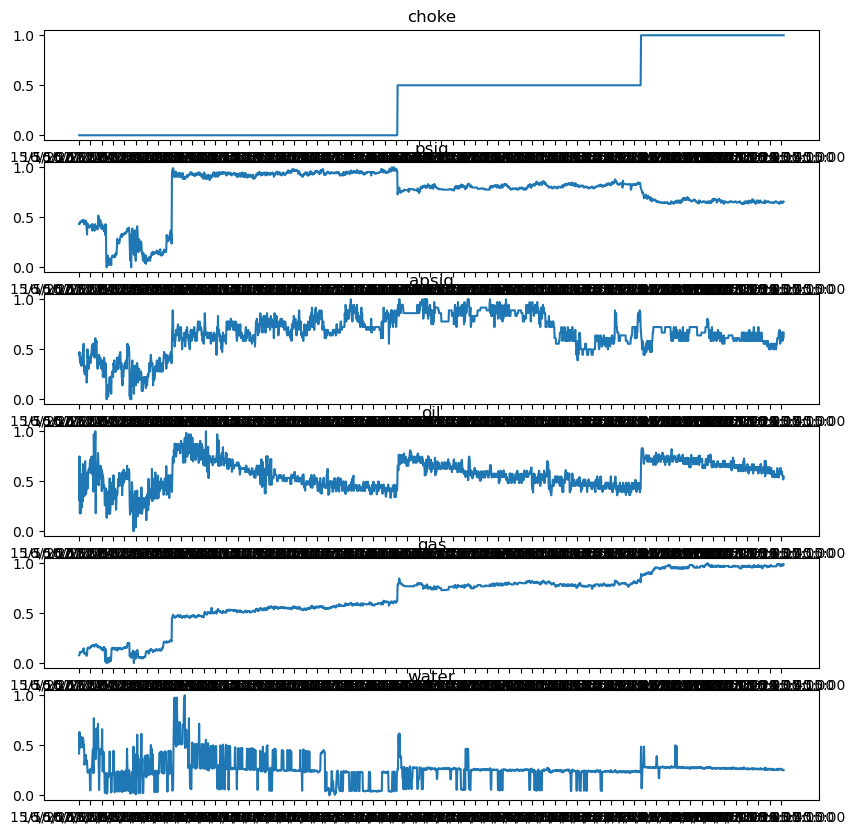

In [10]:
plot_rows(df_normalized, columns2)

# Reference
- https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2
- https://bobrupakroy.medium.com/multivariate-multistep-lstm-38d9536a6b2e

![lstm_model](lstm_model.png)


In [11]:
# get choke 38 only
df_choke_38 = df_raw[df_raw['choke'] == 38].copy()
df_choke_38.head()

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [12]:
scaler = MinMaxScaler()

In [13]:
df_choke_38_normalized = scaler.fit_transform(df_choke_38)
df_choke_38_normalized = pd.DataFrame(df_choke_38_normalized, columns=columns2)
df_choke_38_normalized['datetime'] = df_choke_38.index
df_choke_38_normalized = df_choke_38_normalized.set_index('datetime')
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [14]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
# sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)
# tanh
def tanh(x):
    return math.tanh(x)
# tanh derivative
def tanh_derivative(x):
    return 1.0 - x**2

In [15]:
# create simple LSTM cell no function and class
def simple_lstm_cell(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    """
    Implements a simple LSTM cell.

    Args:
        inputs (ndarray): Input array of shape (batch_size, input_size).
        h (ndarray): Hidden state array of shape (batch_size, hidden_size).
        c (ndarray): Cell state array of shape (batch_size, hidden_size).
        Wf (ndarray): Weight matrix for the forget gate of shape (input_size, hidden_size).
        Wi (ndarray): Weight matrix for the input gate of shape (input_size, hidden_size).
        Wc (ndarray): Weight matrix for the cell state of shape (input_size, hidden_size).
        Wo (ndarray): Weight matrix for the output gate of shape (input_size, hidden_size).
        bf (ndarray): Bias vector for the forget gate of shape (hidden_size,).
        bi (ndarray): Bias vector for the input gate of shape (hidden_size,).
        bc (ndarray): Bias vector for the cell state of shape (hidden_size,).
        bo (ndarray): Bias vector for the output gate of shape (hidden_size,).

    Returns:
        tuple: A tuple containing the updated hidden state (h) and cell state (c) arrays.
    """
    f = sigmoid(np.dot(inputs, Wf) + np.dot(h, bf))
    i = sigmoid(np.dot(inputs, Wi) + np.dot(h, bi))
    c_tilda = tanh(np.dot(inputs, Wc) + np.dot(h, bc))
    c = f * c + i * c_tilda
    o = sigmoid(np.dot(inputs, Wo) + np.dot(h, bo))
    h = o * tanh(c)
    return h, c

In [16]:

cell = pd.DataFrame([], columns=['hidden state', 'cell state'])
# use function above
cell0 = simple_lstm_cell(
    df_choke_38_normalized.iloc[0].values,
    0,
    0,
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)

# create function to simplify code above line 19 and 22
def cell_append(self, new_cell):
    new_cell = pd.DataFrame([new_cell], columns=['hidden state', 'cell state'])
    return pd.concat([self, new_cell], ignore_index=True)
# append the first cell to the cell DataFrame
cell = cell_append(cell, cell0)

# print the updated cell DataFrame
cell

/tmp/ipykernel_5469/1477808862.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([self, new_cell], ignore_index=True)


,hidden state,cell state
0,0.22213,0.317936


In [17]:
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [29]:
df_choke_38_normalized.iloc[0]

choke    0.000000
psig     0.431034
apsig    0.444444
oil      0.311858
gas      0.128135
water    0.417431
Name: 15/5/2021 21:00:00, dtype: float64

In [18]:
# cell 1
cell1 = simple_lstm_cell(
    df_choke_38_normalized.iloc[1].values,
    cell[['hidden state']].iloc[0].values[0],
    cell[['cell state']].iloc[0].values[0],
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)
# cell1
# # append the second cell to the cell DataFrame
cell = cell_append(cell, cell1)
cell

,hidden state,cell state
0,0.222130,0.317936
1,0.604534,0.942748


In [19]:
# what the result of that LSTM cell

#  create loop 
for i in range(2, len(df_choke_38_normalized)):
    new_cell = simple_lstm_cell(
        df_choke_38_normalized.iloc[i].values,
        cell[['hidden state']].iloc[-1].values[0],
        cell[['cell state']].iloc[-1].values[0],
        np.random.rand(6, 1),
        np.random.rand(6, 1),
        np.random.rand(6, 1),
        np.random.rand(6, 1),
        np.random.rand(1, 1),
        np.random.rand(1, 1),
        np.random.rand(1, 1),
        np.random.rand(1, 1)
    )
    cell = cell_append(cell, new_cell)
    

In [20]:
# create neural network from that LSTM cell
def simple_lstm(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states

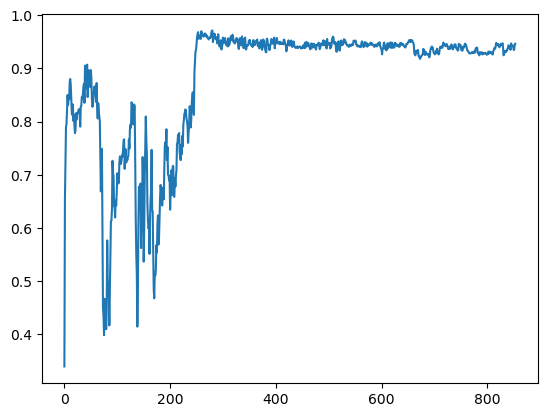

In [23]:
# use that function
hidden_states = simple_lstm(
    df_choke_38_normalized.values,
    0,
    0,
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)
# plot the hidden states
plt.plot(hidden_states)

In [24]:
# unroll prediction
def simple_lstm_unroll(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states, h, c

In [34]:
lstm_unroll = simple_lstm_unroll(
    df_choke_38_normalized.values,
    0,
    0,
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)
print(lstm_unroll)

([0.23697703122620678, 0.5797246260904645, 0.6450310907954713, 0.7509584723181046, 0.7406023268018128, 0.7850499678383096, 0.8285469729545767, 0.7878130163718349, 0.8221364948668148, 0.7999777574076841, 0.8539104462636793, 0.856900429874305, 0.8301502530434476, 0.8120343897303475, 0.7921920377687643, 0.8051566800110423, 0.8399795218080081, 0.7960467869124107, 0.8005751756640019, 0.7835555030101563, 0.7833127374427745, 0.7956642211912022, 0.8229667848071346, 0.8024411046366162, 0.8232223836568636, 0.8292085886173045, 0.8302496891963317, 0.8291700834442607, 0.8339543736287522, 0.8326085819627602, 0.8150796942373932, 0.8473196006847444, 0.8412322985978906, 0.8564847756087389, 0.8396898239698787, 0.8508942419474994, 0.8487567467509693, 0.8584968457967691, 0.8082779215961755, 0.8991554454050914, 0.862915045333358, 0.841540076137551, 0.8691285789445582, 0.8991223903578859, 0.7939664564044342, 0.8511155838415179, 0.8693532030751197, 0.8487454105248541, 0.8591954473823643, 0.8539133716503, 0.8

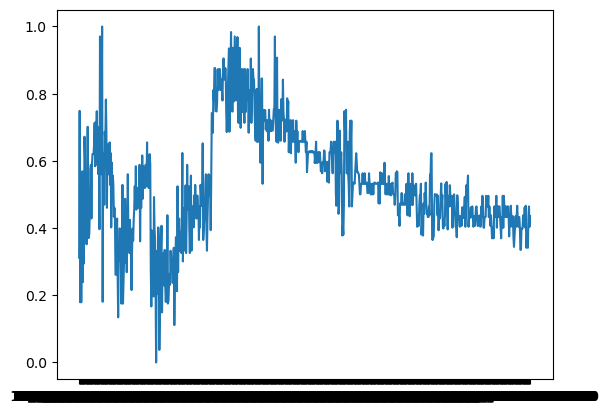

In [26]:
# plot
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

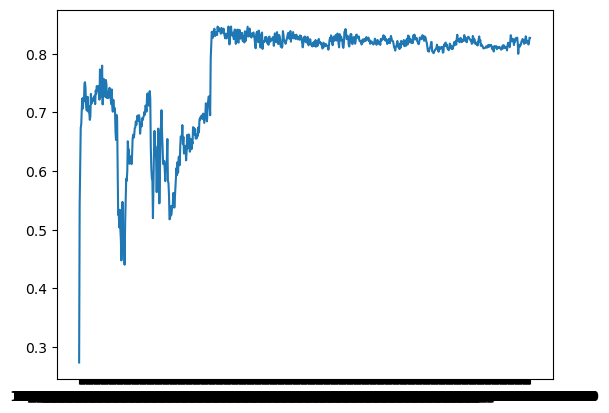

In [31]:
# plot
plt.plot(df_choke_38_normalized.index, lstm_unroll[0], label='Predicted')

In [32]:
lstm_unroll

([0.2738915312179558,
  0.5433737851309789,
  0.6060582397340392,
  0.6737681730806888,
  0.680188912589247,
  0.7067599695972434,
  0.7239586178462604,
  0.7067539377141242,
  0.7246670168380287,
  0.7190619109871104,
  0.7495273076934965,
  0.7516856426085485,
  0.7405876296468772,
  0.7104686810267796,
  0.7034664458590385,
  0.7056738632883268,
  0.7267559998820913,
  0.7014782227801634,
  0.711023997492513,
  0.6990324514022122,
  0.6874461592774221,
  0.6932570100399094,
  0.7316702892852938,
  0.7147875278113572,
  0.7225444582804718,
  0.7184759847122362,
  0.7214000318207768,
  0.7254164322959166,
  0.7242868903120163,
  0.728724173852238,
  0.7142693357138479,
  0.7373282987684234,
  0.7316733064971589,
  0.7449825783408527,
  0.7394886011895613,
  0.7361569653717414,
  0.7450821628054505,
  0.7451428515933947,
  0.7218412466524555,
  0.7734579337306532,
  0.7438106535052686,
  0.727123789246456,
  0.7566470300646273,
  0.7798959227835252,
  0.7137699135420092,
  0.7439227203

In [151]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lstm_forward(x, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c):
    f_t = sigmoid(np.dot(x, W_f) + np.dot(h_prev, U_f) + b_f)
    i_t = sigmoid(np.dot(x, W_i) + np.dot(h_prev, U_i) + b_i)
    o_t = sigmoid(np.dot(x, W_o) + np.dot(h_prev, U_o) + b_o)
    c_tilde_t = np.tanh(np.dot(x, W_c) + np.dot(h_prev, U_c) + b_c)
    c_t = f_t * c_prev + i_t * c_tilde_t
    h_t = o_t * np.tanh(c_t)
    return h_t, c_t

def predict(h, c, W_out, b_out):
    return np.dot(h, W_out) + b_out

# Initialize learnable parameters
W_f = np.random.rand(6, 6)
U_f = np.random.rand(6, 6)
b_f = np.random.rand(6)
W_i = np.random.rand(6, 6)
U_i = np.random.rand(6, 6)
b_i = np.random.rand(6)
W_o = np.random.rand(6, 6)
U_o = np.random.rand(6, 6)
b_o = np.random.rand(6)
W_c = np.random.rand(6, 6)
U_c = np.random.rand(6, 6)
b_c = np.random.rand(6)
W_out = np.random.rand(6, 6)
b_out = np.random.rand(6)

# Initialize hidden state and cell state
h_prev = np.zeros((6,))
c_prev = np.zeros((6,))

predicted_scratch = np.array([])
# Perform forward pass and prediction
for t in range(len(df_choke_38_normalized.values)):
    x_t = df_choke_38_normalized.values[t]
    h_t, c_t = lstm_forward(x_t, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c)
    h_prev = h_t
    c_prev = c_t
    predicted_values = predict(h_t, c_t, W_out, b_out)
    # append array without flatten
    predicted_scratch = np.append(predicted_scratch, predicted_values)
    print(predicted_values)

[1.37555621 2.56569838 2.59563597 1.56052635 1.6305701  1.93527243]
[2.18339822 3.82425715 4.15388023 2.59772198 2.57019577 3.15951496]
[2.33299194 4.06047329 4.43727637 2.78454021 2.74624752 3.3775032 ]
[2.36712242 4.11403548 4.49973591 2.82542922 2.78452382 3.42601809]
[2.36517612 4.11024652 4.49646686 2.82275    2.78288468 3.42303203]
[2.37106576 4.11957326 4.5067172  2.82953208 2.7890738  3.4311374 ]
[2.37491444 4.12624045 4.51365139 2.83457244 2.79311108 3.4368216 ]
[2.36764694 4.11416144 4.5007821  2.82573491 2.78546262 3.4265297 ]
[2.37341686 4.12372424 4.51083924 2.83253109 2.79156598 3.43449532]
[2.37011908 4.11804473 4.5048601  2.82819829 2.78812286 3.42959953]
[2.37983106 4.1337754  4.52173346 2.83935702 2.79850852 3.44270065]
[2.38009667 4.13386155 4.52195693 2.83943826 2.798829   3.44273083]
[2.37623307 4.12719515 4.51509073 2.83462044 2.79478359 3.43714329]
[2.36772112 4.11532469 4.50130938 2.82675652 2.78535332 3.42753066]
[2.36372762 4.1102496  4.49383055 2.82210165 2.7

In [153]:
predicted_scratch_reshaped = np.reshape(predicted_scratch, (-1,6))
predicted_scratch_reshaped

array([[1.37555621, 2.56569838, 2.59563597, 1.56052635, 1.6305701 ,
        1.93527243],
       [2.18339822, 3.82425715, 4.15388023, 2.59772198, 2.57019577,
        3.15951496],
       [2.33299194, 4.06047329, 4.43727637, 2.78454021, 2.74624752,
        3.3775032 ],
       ...,
       [2.39294561, 4.15163776, 4.53993989, 2.85173155, 2.81262363,
        3.45572446],
       [2.39536005, 4.15481637, 4.54434625, 2.85385277, 2.81529292,
        3.45871795],
       [2.39541655, 4.15503495, 4.54448549, 2.85401591, 2.81531547,
        3.4589209 ]])

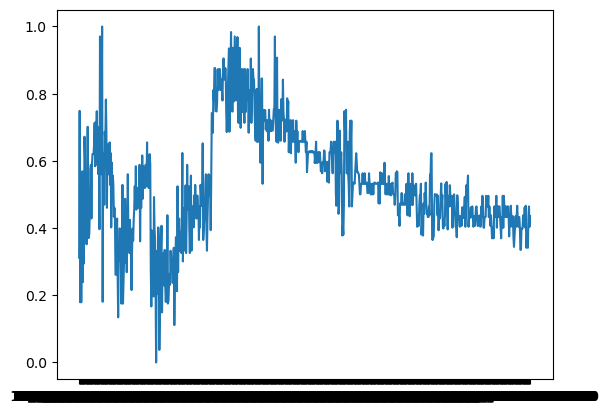

In [154]:
# plot predicted_scratch
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

# FIRST STEP
mungkin ini yang terjadi kalau ambil hidden cellnya

/tmp/ipykernel_5469/480008064.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


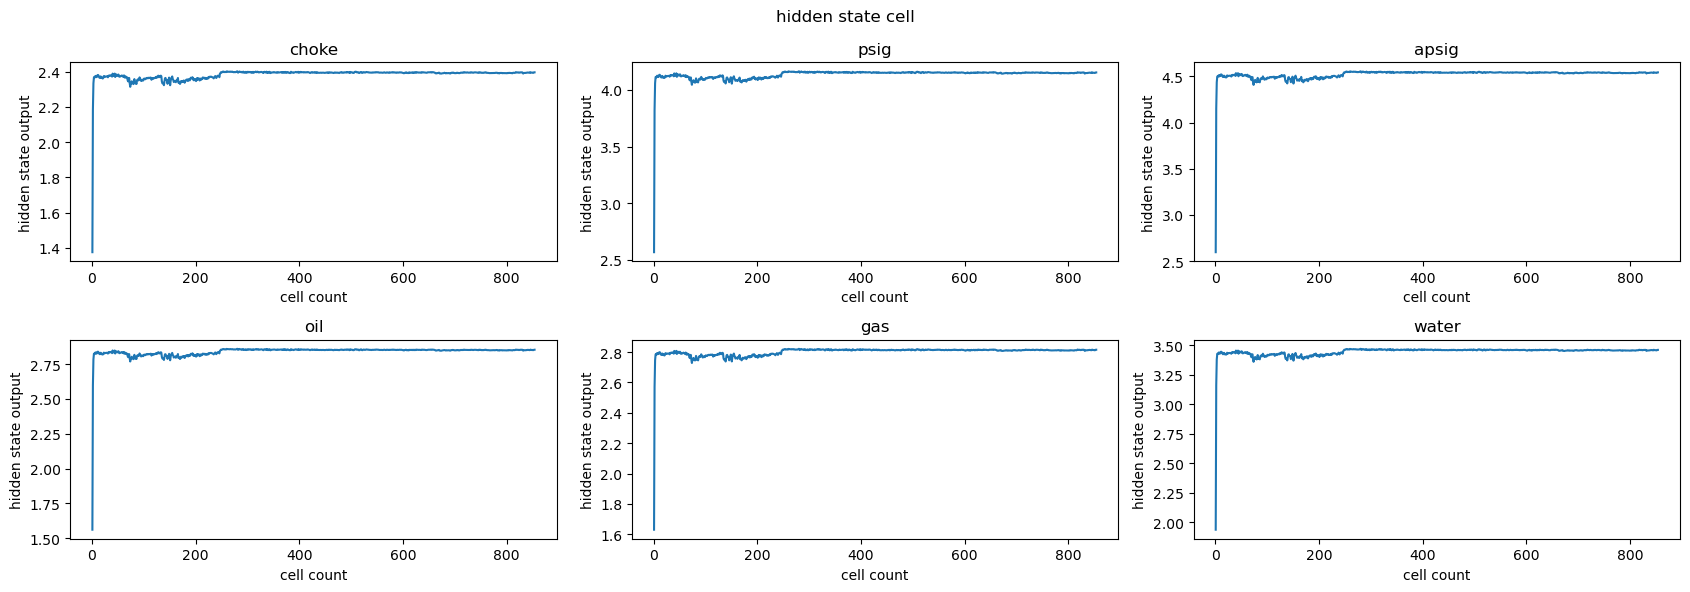

In [188]:
# plot predicted_scratch_reshaped
# plt.plot(range(predicted_scratch_reshaped.shape[0]), predicted_scratch_reshaped, label='Predicted')
fig, ax = plt.subplots(figsize=(17,6), nrows=2, ncols=3)
for i in range(6):
    ax[i//3, i%3].plot(range(1, df_choke_38_normalized.shape[0]+1), predicted_scratch_reshaped[:,i], label='end of hidden state')
    ax[i//3, i%3].set_title(columns2[i])
    ax[i//3, i%3].set_xlabel('cell count')
    ax[i//3, i%3].set_ylabel('hidden state output')
    # add gap each axis

fig.suptitle('hidden state cell')
fig.tight_layout()
fig.show()